In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
#Cargo todos los dataframes
df_postulantes_educacion = pd.read_csv('/home/axel/Descargas/JupyterLab/fiuba_1_postulantes_educacion.csv')
df_postulantes_genero_y_edad = pd.read_csv('/home/axel/Descargas/JupyterLab/fiuba_2_postulantes_genero_y_edad.csv')
df_vistas = pd.read_csv('/home/axel/Descargas/JupyterLab/fiuba_3_vistas.csv')
df_postulaciones = pd.read_csv('/home/axel/Descargas/JupyterLab/fiuba_4_postulaciones.csv')
df_avisos_online = pd.read_csv('/home/axel/Descargas/JupyterLab/fiuba_5_avisos_online.csv')
df_avisos_detalle = pd.read_csv('/home/axel/Descargas/JupyterLab/fiuba_6_avisos_detalle.csv')

In [3]:
df_postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [4]:
df_postulaciones.dtypes

idaviso              int64
idpostulante        object
fechapostulacion    object
dtype: object

In [5]:
df_postulaciones['fechapostulacion'] = pd.to_datetime(df_postulaciones['fechapostulacion'])

In [6]:
df_postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
dtype: object

In [7]:
name_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',
       8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

df_postulaciones['Day'] = df_postulaciones['fechapostulacion'].dt.weekday_name
df_postulaciones['Number'] = df_postulaciones['fechapostulacion'].dt.day
df_postulaciones['Month'] = df_postulaciones['fechapostulacion'].dt.month.apply(lambda x: name_month[x])

df_postulaciones.head()

,idaviso,idpostulante,fechapostulacion,Day,Number,Month
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,15,Jan
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,6,Feb
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,22,Feb
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,22,Feb
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,25,Jan


In [8]:
df_postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
Day                         object
Number                       int64
Month                       object
dtype: object

In [9]:
publicaciones_por_mes=df_postulaciones['Month'].value_counts()
publicaciones_por_mes

Feb    2125425
Jan    1276198
Name: Month, dtype: int64

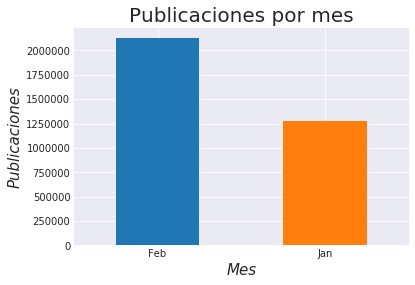

In [10]:
publicaciones_por_mes.plot(kind='bar', rot=0)
plt.title("Publicaciones por mes", size=20)
plt.xlabel("Mes",size=15,style='italic')
plt.ylabel("Publicaciones",size=15,style='italic')
plt.show()

In [11]:
df_postulaciones['Day'].value_counts()

Wednesday    677836
Monday       668310
Tuesday      658428
Thursday     506163
Friday       446698
Sunday       226857
Saturday     217331
Name: Day, dtype: int64

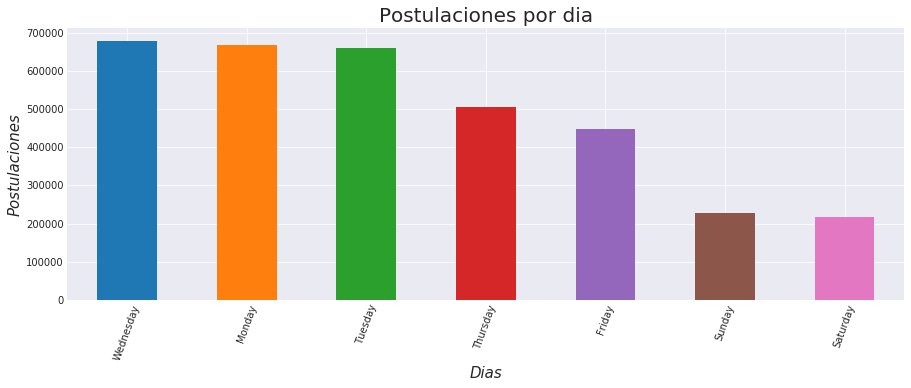

In [12]:
df_postulaciones['Day'].value_counts().plot(kind='bar',figsize=(15,5),rot=70)
plt.title("Postulaciones por dia", size=20)
plt.xlabel("Dias",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()

In [13]:
df_enero = df_postulaciones[df_postulaciones['Month']=='Jan']
df_enero.head()

,idaviso,idpostulante,fechapostulacion,Day,Number,Month
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,15,Jan
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,25,Jan
5,1112277633,5awk,2018-01-29 13:34:44,Monday,29,Jan
20,1112286523,ZaO5,2018-01-24 15:07:39,Wednesday,24,Jan
21,1112272060,ZaO5,2018-01-24 15:20:10,Wednesday,24,Jan


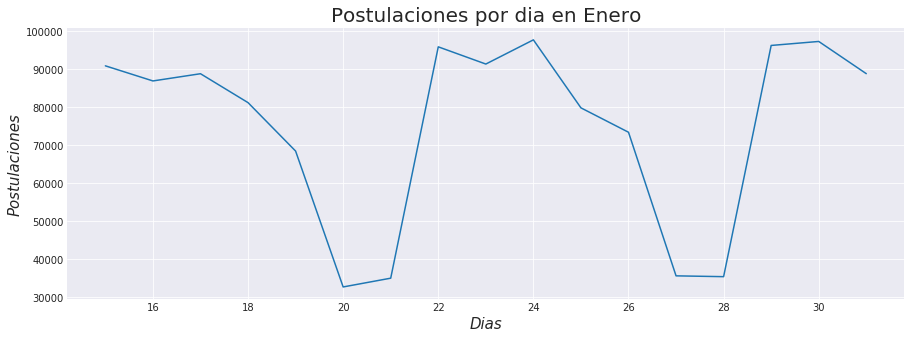

In [14]:
df_enero['Number'].value_counts().sort_index().plot(kind='line',figsize=(15,5))
plt.title("Postulaciones por dia en Enero", size=20)
plt.xlabel("Dias",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()

In [15]:
df_febrero = df_postulaciones[df_postulaciones['Month']=='Feb']

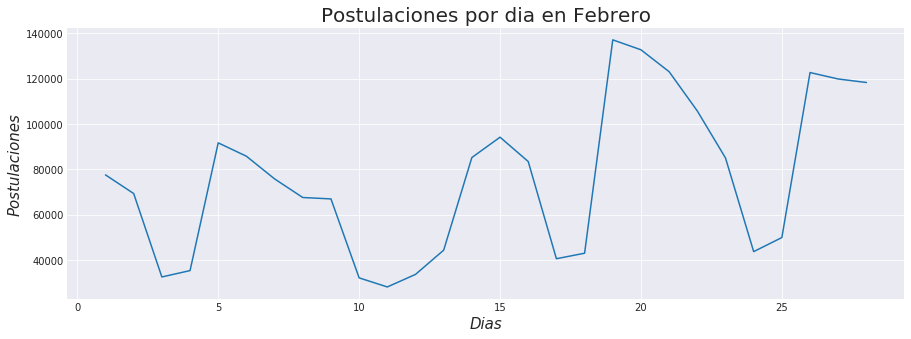

In [16]:
df_febrero['Number'].value_counts().sort_index().plot(kind='line',figsize=(15,5))
plt.title("Postulaciones por dia en Febrero", size=20)
plt.xlabel("Dias",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()

In [3]:
df_avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


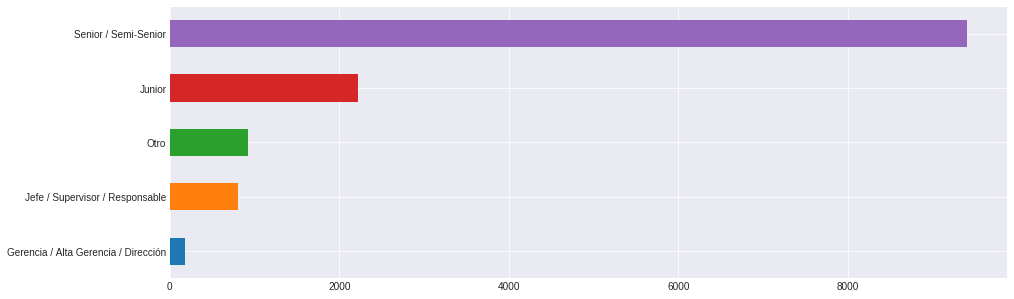

In [15]:
df_avisos_detalle['nivel_laboral'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,5))
plt.show()

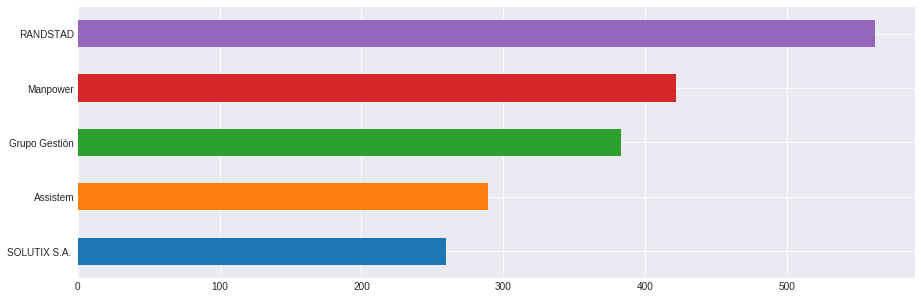

In [16]:
df_avisos_detalle['denominacion_empresa'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,5))
plt.show()

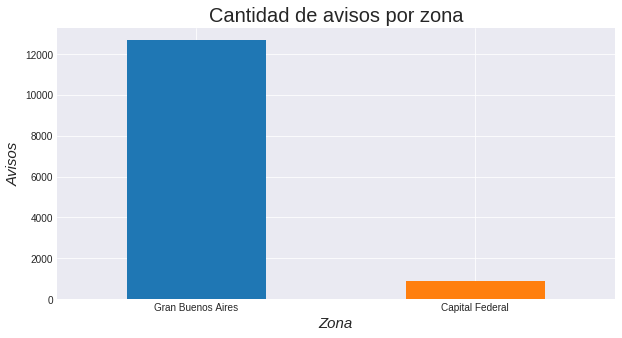

In [4]:
df_avisos_detalle['nombre_zona'].value_counts().head(2).plot(kind='bar',rot=0, figsize=(10,5))
plt.title("Cantidad de avisos por zona", size=20)
plt.xlabel("Zona",size=15,style='italic')
plt.ylabel("Avisos",size=15,style='italic')
plt.show()

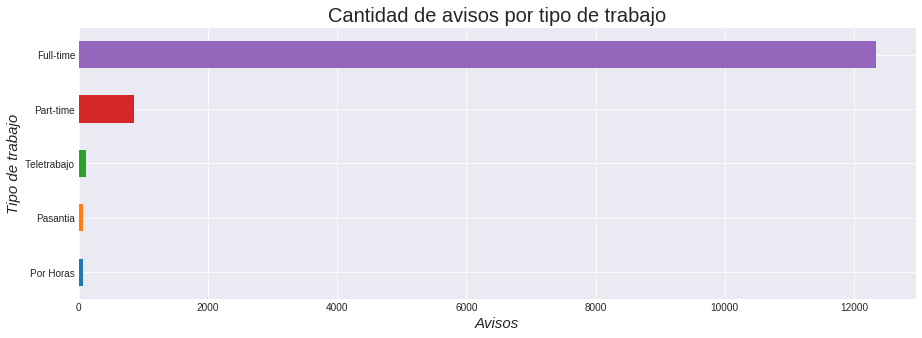

In [5]:
df_avisos_detalle['tipo_de_trabajo'].value_counts().head(5).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por tipo de trabajo", size=20)
plt.xlabel("Avisos",size=15,style='italic')
plt.ylabel("Tipo de trabajo",size=15,style='italic')
plt.show()

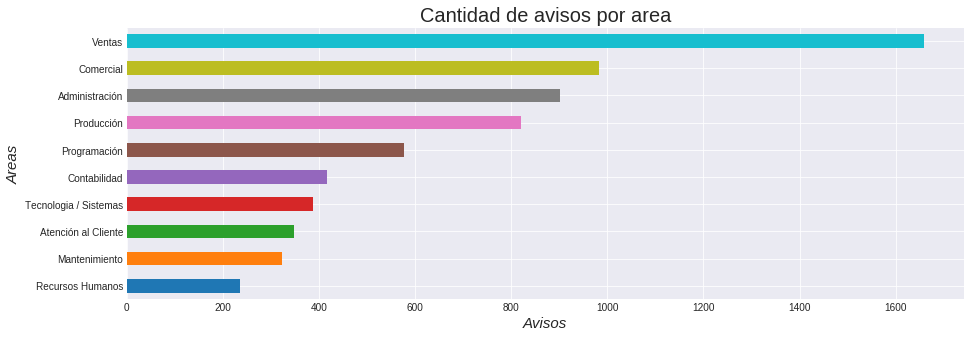

In [98]:
df_avisos_detalle['nombre_area'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por area", size=20)
plt.ylabel("Areas",size=15,style='italic')
plt.xlabel("Avisos",size=15,style='italic')
plt.show()

In [21]:
df_postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


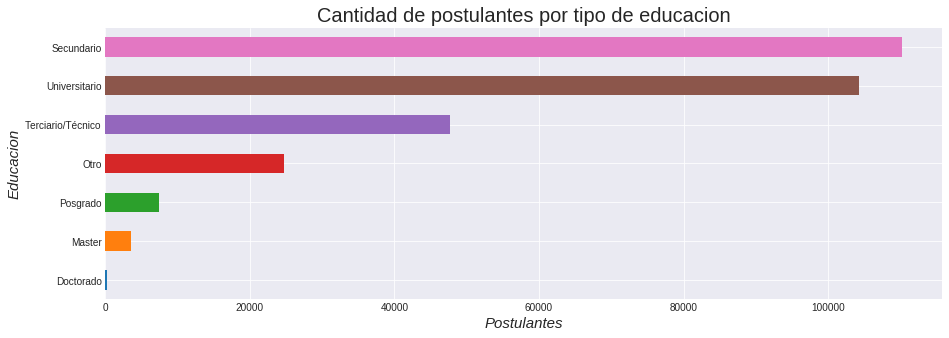

In [7]:
df_postulantes_educacion['nombre'].value_counts(ascending=True).plot(kind='barh', figsize=(15,5))
plt.title("Cantidad de postulantes por tipo de educacion",size=20)
plt.ylabel("Educacion",size=15,style='italic')
plt.xlabel("Postulantes",size=15,style='italic')
plt.show()

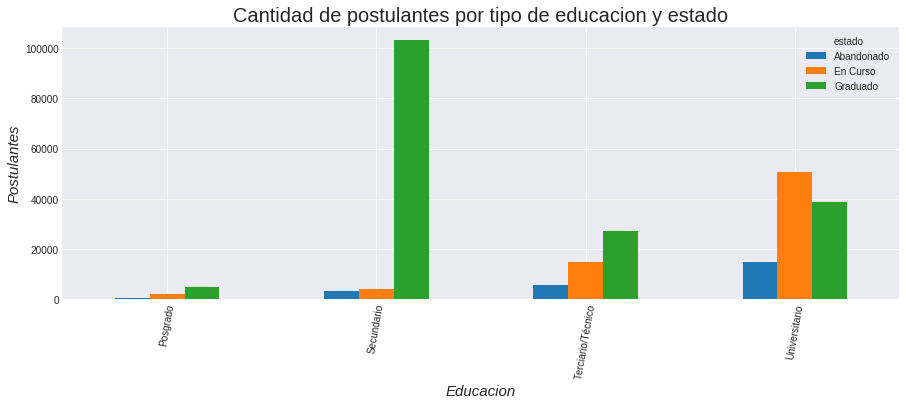

In [8]:
df_postulantes_educacion.groupby(['nombre','estado']).count().unstack()['idpostulante'].drop(['Master','Doctorado','Otro']).plot(kind='bar',rot=80, figsize=(15,5))
plt.title("Cantidad de postulantes por tipo de educacion y estado", size=20)
plt.xlabel("Educacion",size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

In [24]:
df_postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [25]:
df_postulantes_genero_y_edad.dtypes

idpostulante       object
fechanacimiento    object
sexo               object
dtype: object

In [10]:
df_postulantes_genero_y_edad['fechanacimiento'] = pd.to_datetime(df_postulantes_genero_y_edad['fechanacimiento'],errors='coerce')

In [11]:
df_postulantes_genero_y_edad.dtypes

idpostulante               object
fechanacimiento    datetime64[ns]
sexo                       object
dtype: object

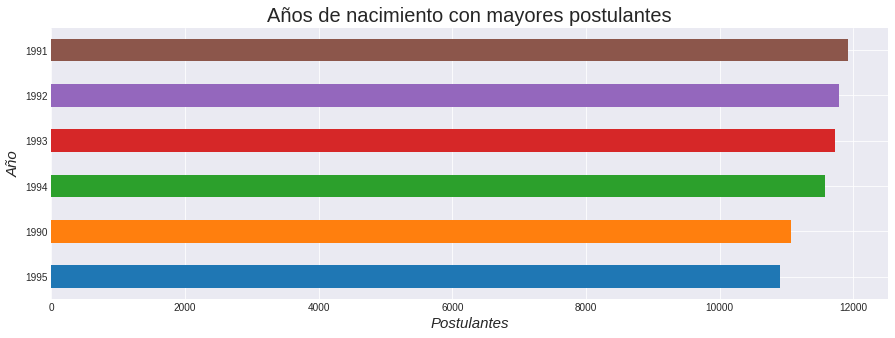

In [12]:
s_fecha_not_null = df_postulantes_genero_y_edad[df_postulantes_genero_y_edad['fechanacimiento'].notnull()]['fechanacimiento']
s_fecha_not_null.dt.year.value_counts().head(6).sort_values().plot(kind='barh', figsize=(15,5))
plt.title("Años de nacimiento con mayores postulantes", size=20)
plt.xlabel("Postulantes", size=15,style='italic')
plt.ylabel("Año",size=15,style='italic')
plt.show()

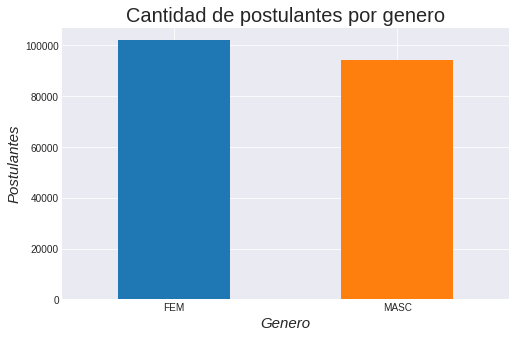

In [13]:
df_postulantes_genero_y_edad['sexo'].value_counts().drop('NO_DECLARA').plot(kind='bar',rot=0,figsize=(8,5))
plt.title("Cantidad de postulantes por genero",size=20)
plt.xlabel("Genero",size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

/home/axel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


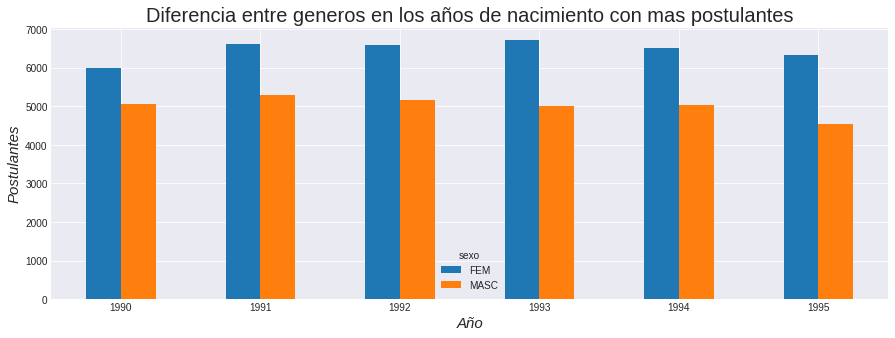

In [14]:
#De 1990 a 1995 son los años de nacimiento con los mayores postulantes

df_mas_post = df_postulantes_genero_y_edad[(df_postulantes_genero_y_edad['fechanacimiento'] >= datetime(1990,1,1)) & ((df_postulantes_genero_y_edad['fechanacimiento']) < datetime(1996,1,1))]
df_mas_post['anio'] = df_mas_post.loc[:,'fechanacimiento'].dt.year
df_mas_post.groupby(['anio','sexo']).count().unstack()['idpostulante'].drop('NO_DECLARA',axis=1).plot(kind='bar',rot=0,figsize=(15,5))
plt.title("Diferencia entre generos en los años de nacimiento con mas postulantes", size=20)
plt.xlabel("Año",size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

In [18]:
df_avisos_detalle_min = df_avisos_detalle.drop(['titulo','idpais','descripcion','ciudad','mapacalle','denominacion_empresa'],axis=1)
df_avisos_detalle_min.head()

,idaviso,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area
0,8725750,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial
1,17903700,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud
2,1000150677,Capital Federal,Full-time,Senior / Semi-Senior,Transporte
3,1000610287,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte
4,1000872556,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Producción


In [23]:
df_merge = df_postulantes_genero_y_edad.merge(df_vistas,how='inner',on='idpostulante').drop('timestamp', axis=1).rename(str.lower, axis=1)
df_merge = df_merge.merge(df_avisos_detalle_min,how='inner',on='idaviso')
df_merge = df_merge.merge(df_postulantes_educacion,how='inner',on='idpostulante').rename({'nombre':'educacion'}, axis=1)
df_merge.head()

,idpostulante,fechanacimiento,sexo,idaviso,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,educacion,estado
0,5awk,1962-12-04,FEM,1112315188,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
1,5awk,1962-12-04,FEM,1112315188,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
2,5awk,1962-12-04,FEM,1112315188,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
3,5awk,1962-12-04,FEM,1112315188,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
4,5awk,1962-12-04,FEM,1112315188,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado


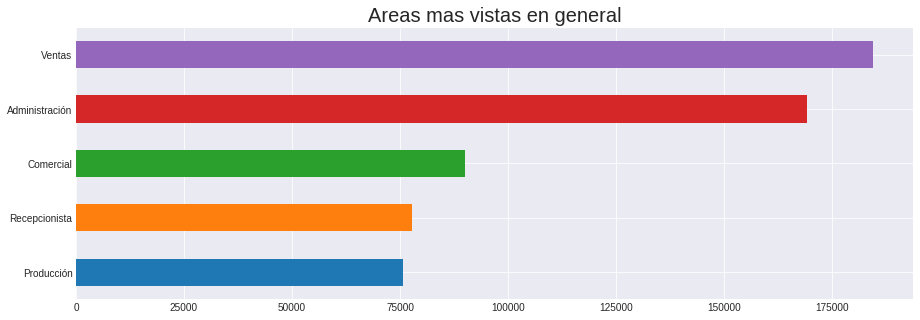

In [24]:
df_merge['nombre_area'].value_counts().head().sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas en general", size=20)
plt.show()

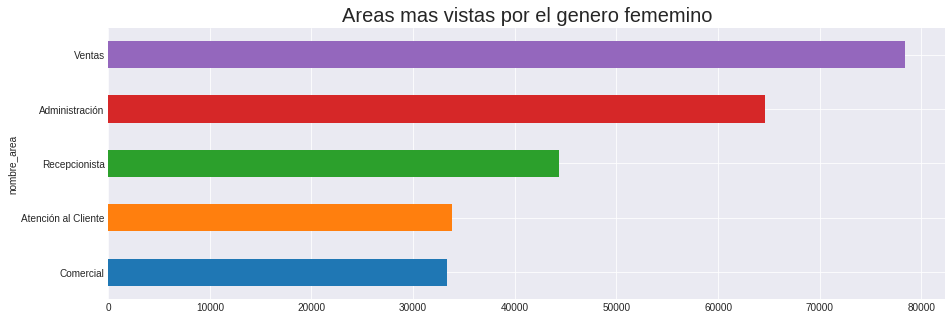

In [54]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['FEM'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero fememino", size=20)
plt.show()

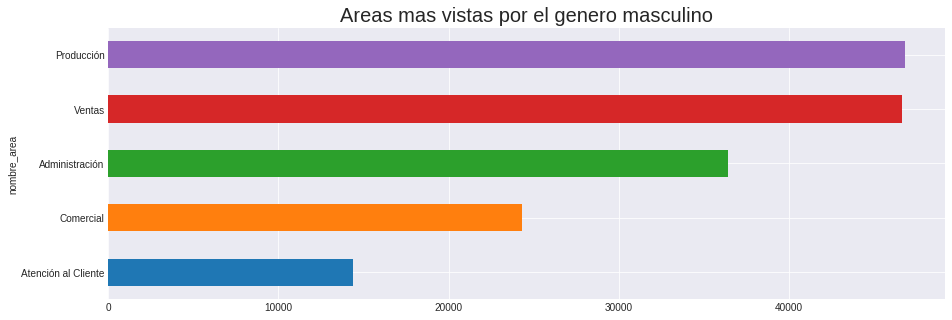

In [55]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['MASC'].sort_values(ascending=False).head().sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero masculino", size=20)
plt.show()

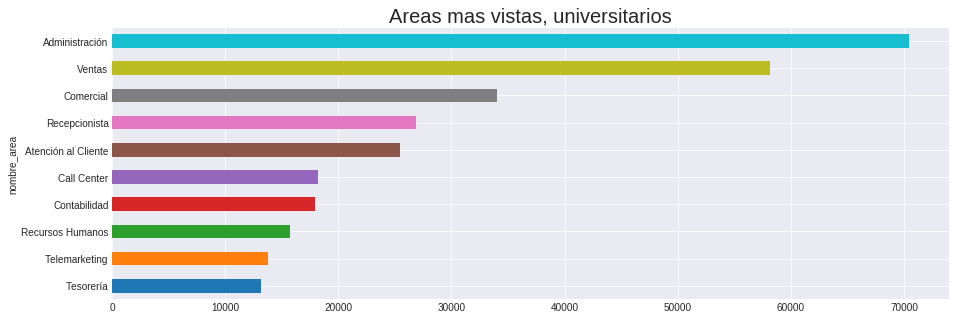

In [27]:
df_merge.groupby(['educacion','nombre_area']).count()['idpostulante']['Universitario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, universitarios", size=20)
plt.show()

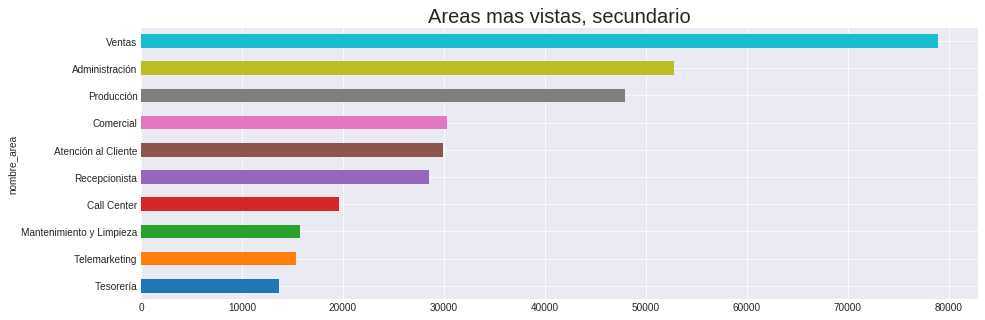

In [29]:
df_merge.groupby(['educacion','nombre_area']).count()['idpostulante']['Secundario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, secundario", size=20)
plt.show()